# Investments Project (Spring 2024)

**Authors:**
- Marc-Antoine Allard
- Adam Zinebi
- Paul Teiletche
- ...

**DUE Date: June 21 at 23:59**

---
# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from utils import ew_strategy, rp_strategy, mv_strategy, scale_to_target_volatility

from functools import reduce

%load_ext autoreload 
%autoreload 2

## Code from sec6

In [4]:


IV_returns = pd.read_parquet('../data/factors/iv_returns.parquet')
MoM_returns = pd.read_parquet('../data/factors/mom_returns.parquet')
T_bill_returns = pd.read_parquet('../data/tbills.parquet')
bab_returns = pd.read_parquet('../data/factors/bab_returns.parquet')

returns_dfs = [IV_returns, MoM_returns, T_bill_returns,bab_returns] 

data = reduce(lambda l,r: pd.merge(l,r, on='date', sort=True), returns_dfs).groupby('date').mean().reset_index()

assets = ['rf']
factors_cols = ['IV', 'MoM','BAB']

#### loading 


In [6]:
strat_returns = pd.read_parquet('../data/strat_returns.parquet')  # Assuming this file contains the STRAT portfolio returns
strat_returns2 = pd.read_parquet('../data/strat_returns copy.parquet')  # Assuming this file contains the STRAT portfolio returns

FamaF = pd.read_csv('../data/FamaFrench5.txt', delimiter= '\s+')
Industry_Returns = pd.read_csv('../data/12_Industry_Portfolios.txt', delimiter= '\s+')
mom_weights = pd.read_parquet('../data/weight/mom_weights.parquet')
bab_weights = pd.read_parquet('../data/weight/BaB_weights.parquet')
iv_weights = pd.read_parquet('../data/weight/iv_weight.parquet')
weights = strat_returns[['w_IV','w_MoM','w_BAB','date']]
weights.columns = ['IV_weight'	,'MoM_weight'	,'bab_returns',	'date']
strat_returns = strat_returns[['date','STRAT']]

## a)

In [10]:
Industries = Industry_Returns.columns.tolist()
Industry_Names = pd.DataFrame(Industries,index=np.arange(1,13)).reset_index()
Industry_Names.columns=['Industry','Name']
Industry_Returns = Industry_Returns.reset_index().rename(columns = {'index':'date'})
Industry_Returns['date'] = pd.to_datetime(Industry_Returns['date'], format='%Y%m', errors='coerce')+pd.offsets.MonthEnd(0)
Industry_Returns['date'] = Industry_Returns['date'].dt.to_period('M')

Factors = FamaF.columns.tolist()
Factors_Names = pd.DataFrame(Factors,index=np.arange(1,7)).reset_index()
Factors_Names.columns=['Factor','Name']
FamaF = FamaF.reset_index().rename(columns = {'index':'date'})
FamaF['date'] = pd.to_datetime(FamaF['date'], format='%Y%m', errors='coerce')+pd.offsets.MonthEnd(0)

FamaF.drop('RF', axis=1, inplace = True)
FamaF['date'] = FamaF['date'].dt.to_period('M')


final_reg = strat_returns.merge(Industry_Returns,on='date',how='left').merge(FamaF,on='date',how='left')
final_reg.drop('date', axis=1, inplace = True)

Y = final_reg.iloc[:, 0]
X = final_reg.drop(final_reg.columns[0], axis=1)


import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  STRAT   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     57.25
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          3.14e-116
Time:                        16:50:23   Log-Likelihood:                 1586.4
No. Observations:                 659   AIC:                            -3137.
Df Residuals:                     641   BIC:                            -3056.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.001      3.774      0.000       0.002       0.006
NoDur         -0.0002      0.000     -0.492      0.623      -0.001       0.001
Durbl          0.0006      0.000      3.064      0.002       0.000       0.001
Manuf          0.0014      0.001      2.557      0.011       0.000       0.002
Enrgy          0.0003      0.000      1.192      0.234      -0.000       0.001
Chems         -0.0014      0.000     -3.127      0.002      -0.002      -0.001
BusEq          0.0009      0.000      2.372      0.018       0.000       0.002
Telcm         -0.0002      0.000     -0.515      0.607      -0.001       0.000
Utils          0.0021      0.000      6.845      0.000       0.001       0.003
Shops          0.0011      0.000      2.669      0.008       0.000       0.002
Hlth       -6.944e-05      0.000     -0.213      0.832      -0.001       0.001
Money         -0.0003      0.000     -0.759      0.448      -0.001       0.001
Other         -0.0002      0.001     -0.280      0.780      -0.001       0.001
Mkt-RF         0.0004      0.002      0.289      0.772      -0.003       0.003
SMB            0.0040      0.000     10.666      0.000       0.003       0.005
HML            0.0007      0.001      1.349      0.178      -0.000       0.002
RMW           -0.0008      0.001     -1.441      0.150      -0.002       0.000
CMA            0.0017      0.001      2.502      0.013       0.000       0.003
==============================================================================
Omnibus:                       50.934   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.089
Skew:                           0.241   Prob(JB):                     5.28e-42
Kurtosis:                       5.587   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## b)

1325994


/var/folders/1y/cd26kgpx7jd535tgk4gkf_3r0000gn/T/ipykernel_23034/2605332955.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_b['FF12'].fillna(12, inplace=True)


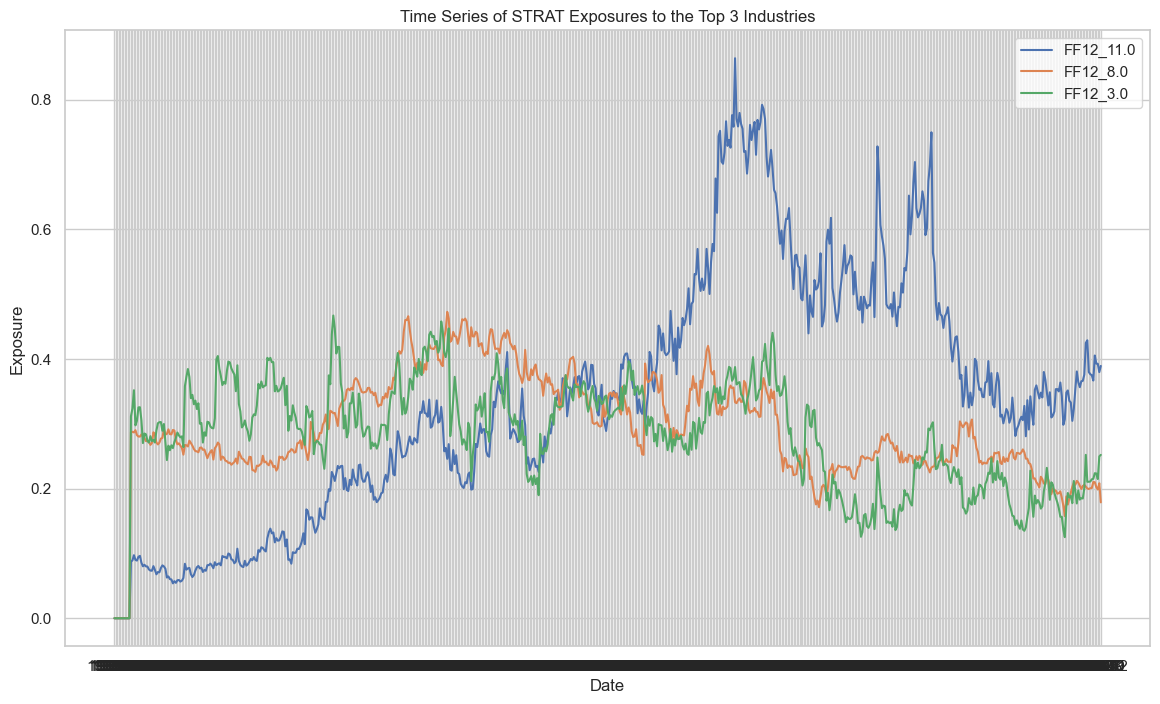

In [11]:
import re
data_b = pd.read_parquet('../data/slow_part.parquet')
print(len(data_b))
with open('../data/Siccodes12.txt', 'r') as file:
    lines = file.readlines()


ff12_mapping = []
current_ff12 = None

for line in lines:
    category_match = re.match(r'^\s*(\d+)\s+\w+', line)
    if category_match:
        current_ff12 = int(category_match.group(1))
    else:   
        interval_match = re.match(r'^\s*(\d+)-(\d+)', line)
        if interval_match:
            start = int(interval_match.group(1))
            end = int(interval_match.group(2))
            ff12_mapping.append((start, end, current_ff12))

def map_siccd_to_ff12(siccd):
    for start, end, ff12 in ff12_mapping:
        if start <= siccd <= end:
            return ff12
    return None


data_b['FF12'] = data_b['siccd'].apply(map_siccd_to_ff12)
data_b['FF12'].fillna(12, inplace=True)

encoded_columns = pd.get_dummies(data_b['FF12'],dtype=int, prefix='FF12')
data_b = pd.concat([data_b, encoded_columns], axis=1)

mom_weights['date'] = mom_weights['date'].dt.strftime('%Y-%m')
bab_weights['date'] = pd.to_datetime(bab_weights['date']).dt.strftime('%Y-%m')

iv_weights['date'] = iv_weights['date'].dt.strftime('%Y-%m')

data_b['date'] = pd.to_datetime(data_b['date']).dt.strftime('%Y-%m')
data_b = data_b.merge(mom_weights, on=['permno','date'], how='right')
data_b = data_b.merge(iv_weights, on=['permno','date'], how='right')

data_b = data_b.merge(bab_weights, on=['permno','date'], how='right')
'''
volatilities = data[factors_cols].rolling(window=12).std()
inverse_vols = 1 / volatilities
weights = inverse_vols.div(inverse_vols.sum(axis=1), axis=0)
weights['date'] = data['date']
strategy_returns = (weights * data[factors_cols]).sum(axis=1)
weights.columns = ['IV_weight', 'MoM_weight', 'bab_returns','date']
'''
weights['date'] = weights['date'].dt.to_timestamp()
weights.date = weights.date.dt.strftime('%Y-%m')
data_b = data_b.merge(weights, on='date', how='left')
data_b['strat_weights'] = data_b['w_MoM_vw']*data_b['MoM_weight'] + data_b['vw_Q']*data_b['IV_weight'] + data_b['bab_returns']*data_b['BaB_strat']

data_b['weighted_beta'] = data_b['beta'] * data_b['strat_weights']
strat_market_exposure = data_b.groupby('date')['weighted_beta'].sum()

industry_exposures = {}
for i in range(1, 13):
    data_b[f'weighted_FF12_{i}.0'] = data_b[f'FF12_{i}.0'] * data_b['strat_weights']
    industry_exposures[f'FF12_{i}.0'] = data_b.groupby('date')[f'weighted_FF12_{i}.0'].sum()

industry_exposures_df = pd.DataFrame(industry_exposures)

top_3_industries = industry_exposures_df.mean().nlargest(3).index

plt.figure(figsize=(14, 8))

for industry in top_3_industries:
    plt.plot(industry_exposures_df.index, industry_exposures_df[industry], label=industry)

plt.title('Time Series of STRAT Exposures to the Top 3 Industries')
plt.xlabel('Date')
plt.ylabel('Exposure')
plt.legend()
plt.show()

## c)

In [12]:
from tqdm import tqdm

industry_returns = pd.DataFrame()
dates = data_b['date'].unique()
data
for date in tqdm(dates):
    daily_data = data_b[data_b['date'] == date]
    for i in range(1, 13):
        industry_stocks = daily_data[daily_data[f'FF12_{i}.0'] == 1.0]
        if not industry_stocks.empty:
            total_mcap = industry_stocks['mcap'].sum()
            industry_return = (industry_stocks['Rn'] * industry_stocks['mcap']).sum() / total_mcap
            industry_returns.loc[date, f'industry_return_{i}'] = industry_return

industry_returns.reset_index(inplace=True)
industry_returns.rename(columns={'index': 'date'}, inplace=True)

industry_exposures_df.reset_index(inplace=True)
strat_returns.date = strat_returns.date.dt.strftime('%Y-%m')
industry_exposures_df.date = pd.to_datetime(industry_exposures_df.date).dt.strftime('%Y-%m')
industry_returns.date = pd.to_datetime(industry_returns.date).dt.strftime('%Y-%m')

data_b = strat_returns.merge(industry_exposures_df, on='date').merge(industry_returns, on='date')


hedged_returns = data_b['STRAT']
for i in range(1, 13):
    industry_col = f'FF12_{i}.0'
    industry_return_col = f'industry_return_{i}'
    data_b[f'hedge_return_{i}'] = data_b[industry_col] * data_b[industry_return_col]
    hedged_returns -= data_b[f'hedge_return_{i}']

data_b['hedged_return'] = hedged_returns

average_return = data_b['hedged_return'].mean()
std_dev = data_b['hedged_return'].std()
sharpe_ratio = average_return / std_dev

print(f"Average Return of Hedged STRAT Portfolio: {average_return}")
print(f"Standard Deviation of Hedged STRAT Portfolio: {std_dev}")
print(f"Sharpe Ratio of Hedged STRAT Portfolio: {sharpe_ratio}")


100%|██████████| 659/659 [00:25<00:00, 26.15it/s]


Average Return of Hedged STRAT Portfolio: -0.022972713864086232
Standard Deviation of Hedged STRAT Portfolio: 0.08291110513035264
Sharpe Ratio of Hedged STRAT Portfolio: -0.2770764402183349
